In [ ]:
import tensorflow as tf
(x_train,y_train), (x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

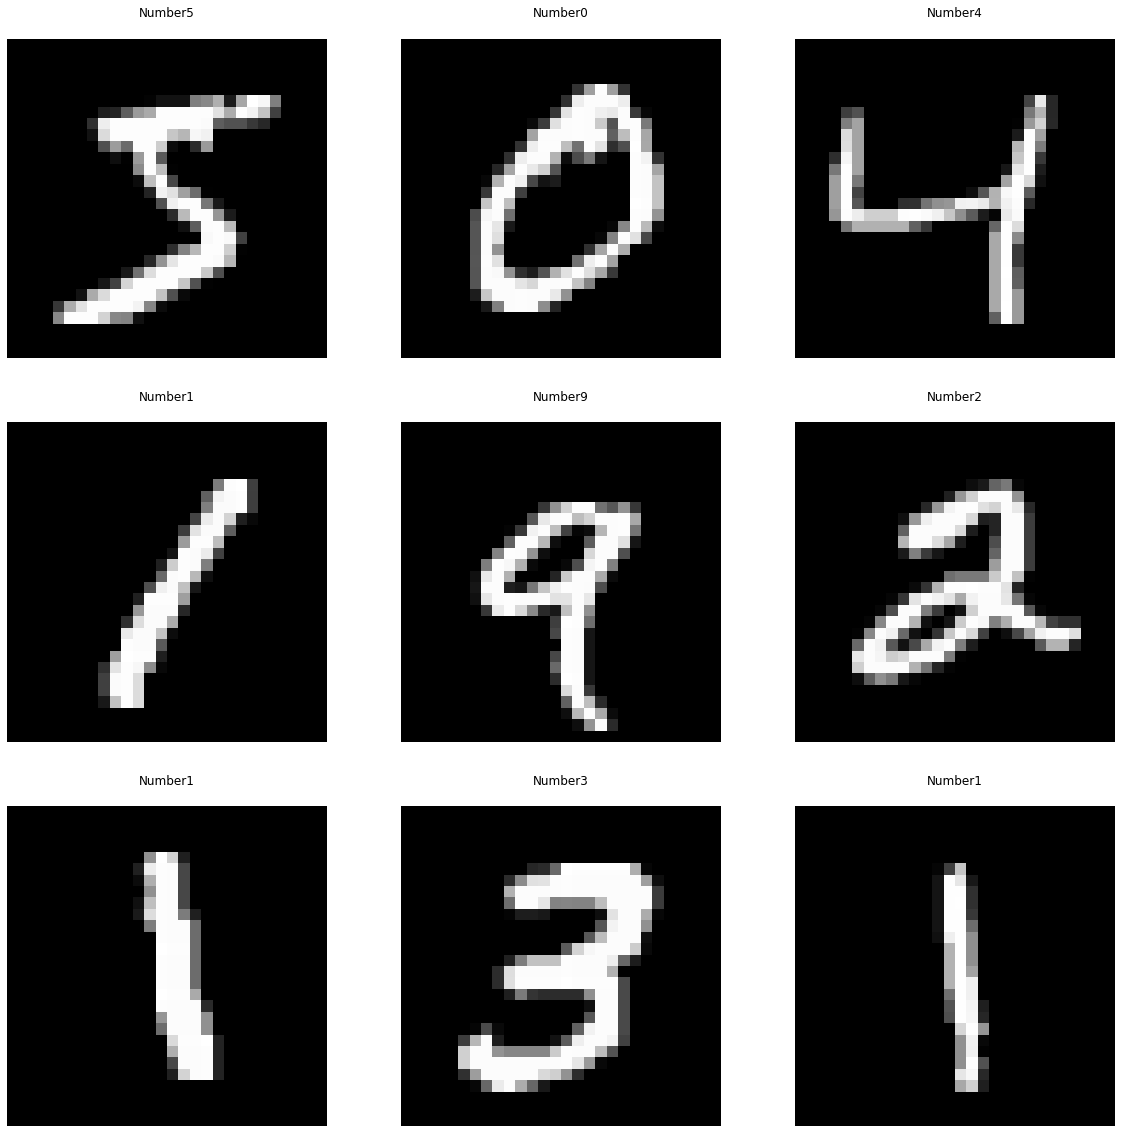

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs= plt.subplots(3,3, figsize=(20,20))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number{}'.format(y_train[i]))
fig.show()

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [ ]:
x_train.shape  #no.of images in x_train is 60000

(60000, 28, 28, 1)

In [ ]:
x_test.shape #no.of images in x_test

(10000, 28, 28, 1)

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print('Number of images in x_train' , x_train.shape[0])
print('Number of images in x_test' , x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model= Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0257 - accuracy: 0.9915
Epoch 2/4
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0213 - accuracy: 0.9924
Epoch 3/4
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0193 - accuracy: 0.9933
Epoch 4/4
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0171 - accuracy: 0.9942


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0666 - accuracy: 0.9841


[0.06656404584646225, 0.9840999841690063]